In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import numpy_financial as npf
from scipy.interpolate import interp1d

import os
import Moduls as mod
from Moduls import dispatchwithpcs
from Moduls import analysiswithpcs
from Moduls import analysiswithpcsongrid
from Moduls import plotwithpcs
from Moduls import plotperiodwithpcs

In [4]:
demand = pd.read_csv('bebaninterpolasi_jam.csv', index_col=0, header=None, parse_dates=True) .squeeze("columns")
pv_1kW = pd.read_csv('pv_perjam.csv', index_col=0, header=None, parse_dates=True) .squeeze("columns")

In [5]:
pv_1kW

0
2023-01-02 00:00:00    1.0
2023-01-02 01:00:00    1.0
2023-01-02 02:00:00    1.0
2023-01-02 03:00:00    1.0
2023-01-02 04:00:00    1.0
                      ... 
2023-02-28 19:00:00    0.0
2023-02-28 20:00:00    0.0
2023-02-28 21:00:00    0.0
2023-02-28 22:00:00    0.0
2023-02-28 23:00:00    0.0
Name: 1, Length: 1392, dtype: float64

In [6]:
#pv_1kW = pd.DataFrame({'Time': pv_1kW.index, 'Power': pv_1kW.values.round(2)})
#print(pv_1kW)

In [7]:
# Mengubah kolom 'Time' menjadi tipe data datetime
#pv_1kW['Time'] = pd.to_datetime(pv_1kW['Time'])
# Mengambil jumlah energi dalam 1 jam
#pv1bulan = pv_1kW.resample('D', on='Time').sum().round(2)
#print(pv1bulan)
#beban_df_jam.to_csv('pv_perjam.csv', header=False)

In [8]:
#demand = pd.DataFrame({'Time': demand.index, 'Power': demand.values.round(2)})
#print(demand)

In [9]:
# Mengubah kolom 'Time' menjadi tipe data datetime
#demand['Time'] = pd.to_datetime(demand['Time'])
# Mengambil jumlah energi dalam 1 jam
#pv1bulan = demand.resample('D', on='Time').sum().round(2)
#print(pv1bulan)
#pv1bulan.to_csv('demand_perminggu_aktual.csv', header=False)

In [10]:
demand

0
2023-01-02 00:00:00      0.00
2023-01-02 01:00:00      0.00
2023-01-02 02:00:00      0.00
2023-01-02 03:00:00      0.00
2023-01-02 04:00:00      0.00
                        ...  
2023-02-28 19:00:00    660.92
2023-02-28 20:00:00    625.42
2023-02-28 21:00:00    565.58
2023-02-28 22:00:00    608.64
2023-02-28 23:00:00    599.92
Name: 1, Length: 1392, dtype: float64

In [11]:
param_tech = {'BatteryCapacity': 1600,#kWh              
              'BatteryEfficiency': 0.9,
              'HybridInverterEfficiency': 0.987,
              'InverterEfficiency': 0.9,
              'timestep': 1,
              'LimitSOC': 320
             }

pv = pv_1kW

In [12]:
E1 = dispatchwithpcs.dispatch_max_sc(pv, demand, param_tech, return_series=False)


C:\Users\User\Downloads\Program PLTS\Moduls\dispatchwithpcs.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pv_inv[i] >= demand[i]: #jika PV lebih besar dari beban maka
C:\Users\User\Downloads\Program PLTS\Moduls\dispatchwithpcs.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inv_load[i] = demand[i] * eff_hyinv #daya dari inverter ke beban adalah besar beban itu sendiri
C:\Users\User\Downloads\Program PLTS\Moduls\dispatchwithpcs.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

In [13]:
E1.keys()

dict_keys(['pv_inv', 'res_loadPV', 'res_pv', 'inv_batt', 'usable_energy', 'inv_load', 'grid_load', 'batt_pcs', 'res_batt_pcs', 'SOC', 'batt_load', 'res_loadbatt', 'self_consumption', 'batt_grid'])

In [14]:
#output = E1
#pv_inv = output['pv_inv']
#df = pd.DataFrame({'Time': pv_inv.index, 'Power': pv_inv.values.round(2)})
#print(df)
#df.to_csv('self_consumptionaktual_jam.csv', header=False)

In [15]:
# Ubah index menjadi format datetime
#pv_inv.index = pd.to_datetime(pv_inv.index)

# Resample data per hari dan hitung jumlah daya per hari
#pv_inv = pv_inv.resample('W').sum()

# Buat DataFrame baru dengan kolom 'Date' dan 'Power'
#pv_inv = pd.DataFrame({'Date': pv_inv.index, 'Power': pv_inv.values.round(2)})

# Tampilkan DataFrame hasil perubahan
#print(pv_inv)

#pv_inv.to_csv('pv_invW15%.csv', index=False)

In [16]:
#output = E1
#self_consumption = output['self_consumption']
#df = pd.DataFrame({'Time': self_consumption.index, 'Power': self_consumption.values.round(2)})
#print(df)
#df.to_csv('self_consumptionaktual_jam.csv', header=False)

In [17]:
# Ubah index menjadi format datetime
#self_consumption.index = pd.to_datetime(self_consumption.index)

# Resample data per hari dan hitung jumlah daya per hari
#self_consumption = self_consumption.resample('W').sum()

# Buat DataFrame baru dengan kolom 'Date' dan 'Power'
#self_consumption = pd.DataFrame({'Date': self_consumption.index, 'Power': self_consumption.values.round(2)})

# Tampilkan DataFrame hasil perubahan
#print(self_consumption)

#self_consumption.to_csv('self_consumption_aktualW.csv', index=False)

In [18]:
#output = E1
#res_pv = output['res_pv']
#df = pd.DataFrame({'Time': res_pv.index, 'Power': res_pv.values.round(2)})
#print(df)
#df.to_csv('self_consumptionaktual_jam.csv', header=False)

In [19]:
# Ubah index menjadi format datetime
#res_pv.index = pd.to_datetime(res_pv.index)

# Resample data per hari dan hitung jumlah daya per hari
#res_pv = res_pv.resample('W').sum()

# Buat DataFrame baru dengan kolom 'Date' dan 'Power'
#res_pv = pd.DataFrame({'Date': res_pv.index, 'Power': res_pv.values.round(2)})

# Tampilkan DataFrame hasil perubahan
#print(res_pv)
#res_pv.to_csv('respv_hybridW_aktual.csv', index=False)

In [20]:
#output = E1
#inv_batt = output['inv_batt']
#df = pd.DataFrame({'Time': inv_batt.index, 'Power': inv_batt.values.round(2)})
#print(df)
#df.to_csv('self_consumptionaktual_jam.csv', header=False)

In [21]:
# Ubah index menjadi format datetime
#inv_batt.index = pd.to_datetime(inv_batt.index)

# Resample data per hari dan hitung jumlah daya per hari
#inv_batt = inv_batt.resample('W').sum()

# Buat DataFrame baru dengan kolom 'Date' dan 'Power'
#inv_batt = pd.DataFrame({'Date': inv_batt.index, 'Power': inv_batt.values.round(2)})

# Tampilkan DataFrame hasil perubahan
#print(inv_batt)
#inv_batt.to_csv('pengisian baterai beban aktual .csv', index=False)

In [22]:
#output = E1
#batt_load = output['batt_load']
#df = pd.DataFrame({'Time': batt_load.index, 'Power': batt_load.values.round(2)})
#print(df)
#df.to_csv('self_consumptionaktual_jam.csv', header=False)

In [23]:
# Ubah index menjadi format datetime
#batt_load.index = pd.to_datetime(batt_load.index)

# Resample data per hari dan hitung jumlah daya per hari
#batt_load = batt_load.resample('D').sum()

# Buat DataFrame baru dengan kolom 'Date' dan 'Power'
#batt_load = pd.DataFrame({'Date': batt_load.index, 'Power': batt_load.values.round(2)})

# Tampilkan DataFrame hasil perubahan
#print(batt_load)
#batt_load.to_csv('baterai ke beban aktualW .csv', index=False)

In [24]:
#output = E1
#grid_load = output['grid_load']
#df = pd.DataFrame({'Time': grid_load.index, 'Power': grid_load.values.round(2)})
#print(df)
#df.to_csv('self_consumptionaktual_jam.csv', header=False)

In [25]:
# Ubah index menjadi format datetime
#grid_load.index = pd.to_datetime(grid_load.index)

# Resample data per hari dan hitung jumlah daya per hari
#grid_load = grid_load.resample('W').sum()

# Buat DataFrame baru dengan kolom 'Date' dan 'Power'
#grid_load = pd.DataFrame({'Date': grid_load.index, 'Power': grid_load.values.round(2)})

# Tampilkan DataFrame hasil perubahan
##print(grid_load)
#grid_load.to_csv('grid ke beban aktual W .csv', index=False)

In [26]:
analysiswithpcs.print_analysis(pv, demand, param_tech, E1)

Total kebutuhan beban pertahun         : 22403838.72 kWh
Total produksi PV pertahun             : 1238279.94 kWh
Self Consumption                       : 1225438.24 kWh
PV ke Beban                            : 1199749.9 kWh
Sisa PV                                : 22721.88 kWh
Sisa Beban setelah disuplai PV         : 21203710.7 kWh
jumlah energi dari PV ke baterai       : 20183.846 kWh
Jumlah energi baterai ke beban         : 25688.35 kWh
Sisa Beban setelah disuplai Baterai    : 21178022.3 kWh
Total daya impor dari grid pertahun    : 21178022.3 kWh
Total daya ekspor ke grid pertahun     : 2175.493 kWh
Self consumption rate (SCR)            : 99%
Self sufficiency rate (SSR)            : 5.47%
Average depth perday                   : 0.074
Average depth peryear                  : 26.9931
LifeCycle                              : 148.186Tahun
Total rugi-rugi Hybridinverter         : 16694 kWh
Total rugi-rugi baterai                : 2018.38 kWh


## NPV,IRR,PBP PLTS Hybrid dengan penjualan ke grid

In [27]:
# Membaca data dari file CSV
df = pd.read_csv('kasbersihhybridjual.csv', header=None)
cash_flows = df[0].apply(lambda x: int(x.replace('.', '').replace('Rp', '')))
aruskasbersih = pd.read_csv('kasbersihhybridjual.csv', header=None, names=['Nilai'])
kumulatifaruskas = pd.read_csv('kumulatifkashybridjual.csv', header=None, names=['Nilai'])

# Menghitung NPV (Net Present Value) dengan tingkat pengembalian 8.6%
rate_of_return = 0.086
npv = npf.npv(rate_of_return, cash_flows)
irr = npf.irr(cash_flows)

def payback():
    # Mengonversi kolom 'Nilai' ke tipe data numerik
    aruskasbersih['Nilai'] = aruskasbersih['Nilai'].str.replace('.', '').astype(float)
    kumulatifaruskas['Nilai'] = kumulatifaruskas['Nilai'].str.replace('.', '').astype(float)

    full_year = (kumulatifaruskas['Nilai'] < 0).idxmax() 
    fractional_year = -kumulatifaruskas.loc[full_year, 'Nilai'] / aruskasbersih.loc[full_year + 1, 'Nilai']
    period = full_year + fractional_year
    return round(period, 1)
    
# Menampilkan hasil NPV, IRR, dan present values
print("NPV Hybrid dengan penjualan ke grid:", npv)
print("IRR Hybrid dengan penjualan ke grid: {:.2f}%".format(irr * 100))
print("Payback Period Hybrid dengan penjualan ke grid:", payback(), "tahun")

 


NPV Hybrid dengan penjualan ke grid: 1162299291.2825475
IRR Hybrid dengan penjualan ke grid: 9.76%
Payback Period Hybrid dengan penjualan ke grid: 8.1 tahun


## NPV,IRR,PBP PLTS Hybrid tanpa penjualan ke grid

In [28]:
# Membaca data dari file CSV
df = pd.read_csv('kasbersihhybrid.csv', header=None)
cash_flows = df[0].apply(lambda x: int(x.replace('.', '').replace('Rp', '')))
aruskasbersih = pd.read_csv('kasbersihhybrid.csv', header=None, names=['Nilai'])
kumulatifaruskas = pd.read_csv('kumulatifkashybrid.csv', header=None, names=['Nilai'])

# Menghitung NPV (Net Present Value) dengan tingkat pengembalian 8.6%
rate_of_return = 0.086
npv = npf.npv(rate_of_return, cash_flows)
irr = npf.irr(cash_flows)

def payback():
    # Mengonversi kolom 'Nilai' ke tipe data numerik
    aruskasbersih['Nilai'] = aruskasbersih['Nilai'].str.replace('.', '').astype(float)
    kumulatifaruskas['Nilai'] = kumulatifaruskas['Nilai'].str.replace('.', '').astype(float)

    full_year = (kumulatifaruskas['Nilai'] < 0).idxmax() 
    fractional_year = -kumulatifaruskas.loc[full_year, 'Nilai'] / aruskasbersih.loc[full_year + 1, 'Nilai']
    period = full_year + fractional_year
    return round(period, 1)
    
# Menampilkan hasil NPV, IRR, dan present values
print("NPV Hybrid tanpa penjualan ke grid:", npv)
print("IRR Hybrid tanpa penjualan ke grid: {:.2f}%".format(irr * 100))
print("Payback Period Hybrid tanpa penjualan ke grid:", payback(), "tahun")

 


NPV Hybrid tanpa penjualan ke grid: 721921252.0806262
IRR Hybrid tanpa penjualan ke grid: 9.33%
Payback Period Hybrid tanpa penjualan ke grid: 8.4 tahun


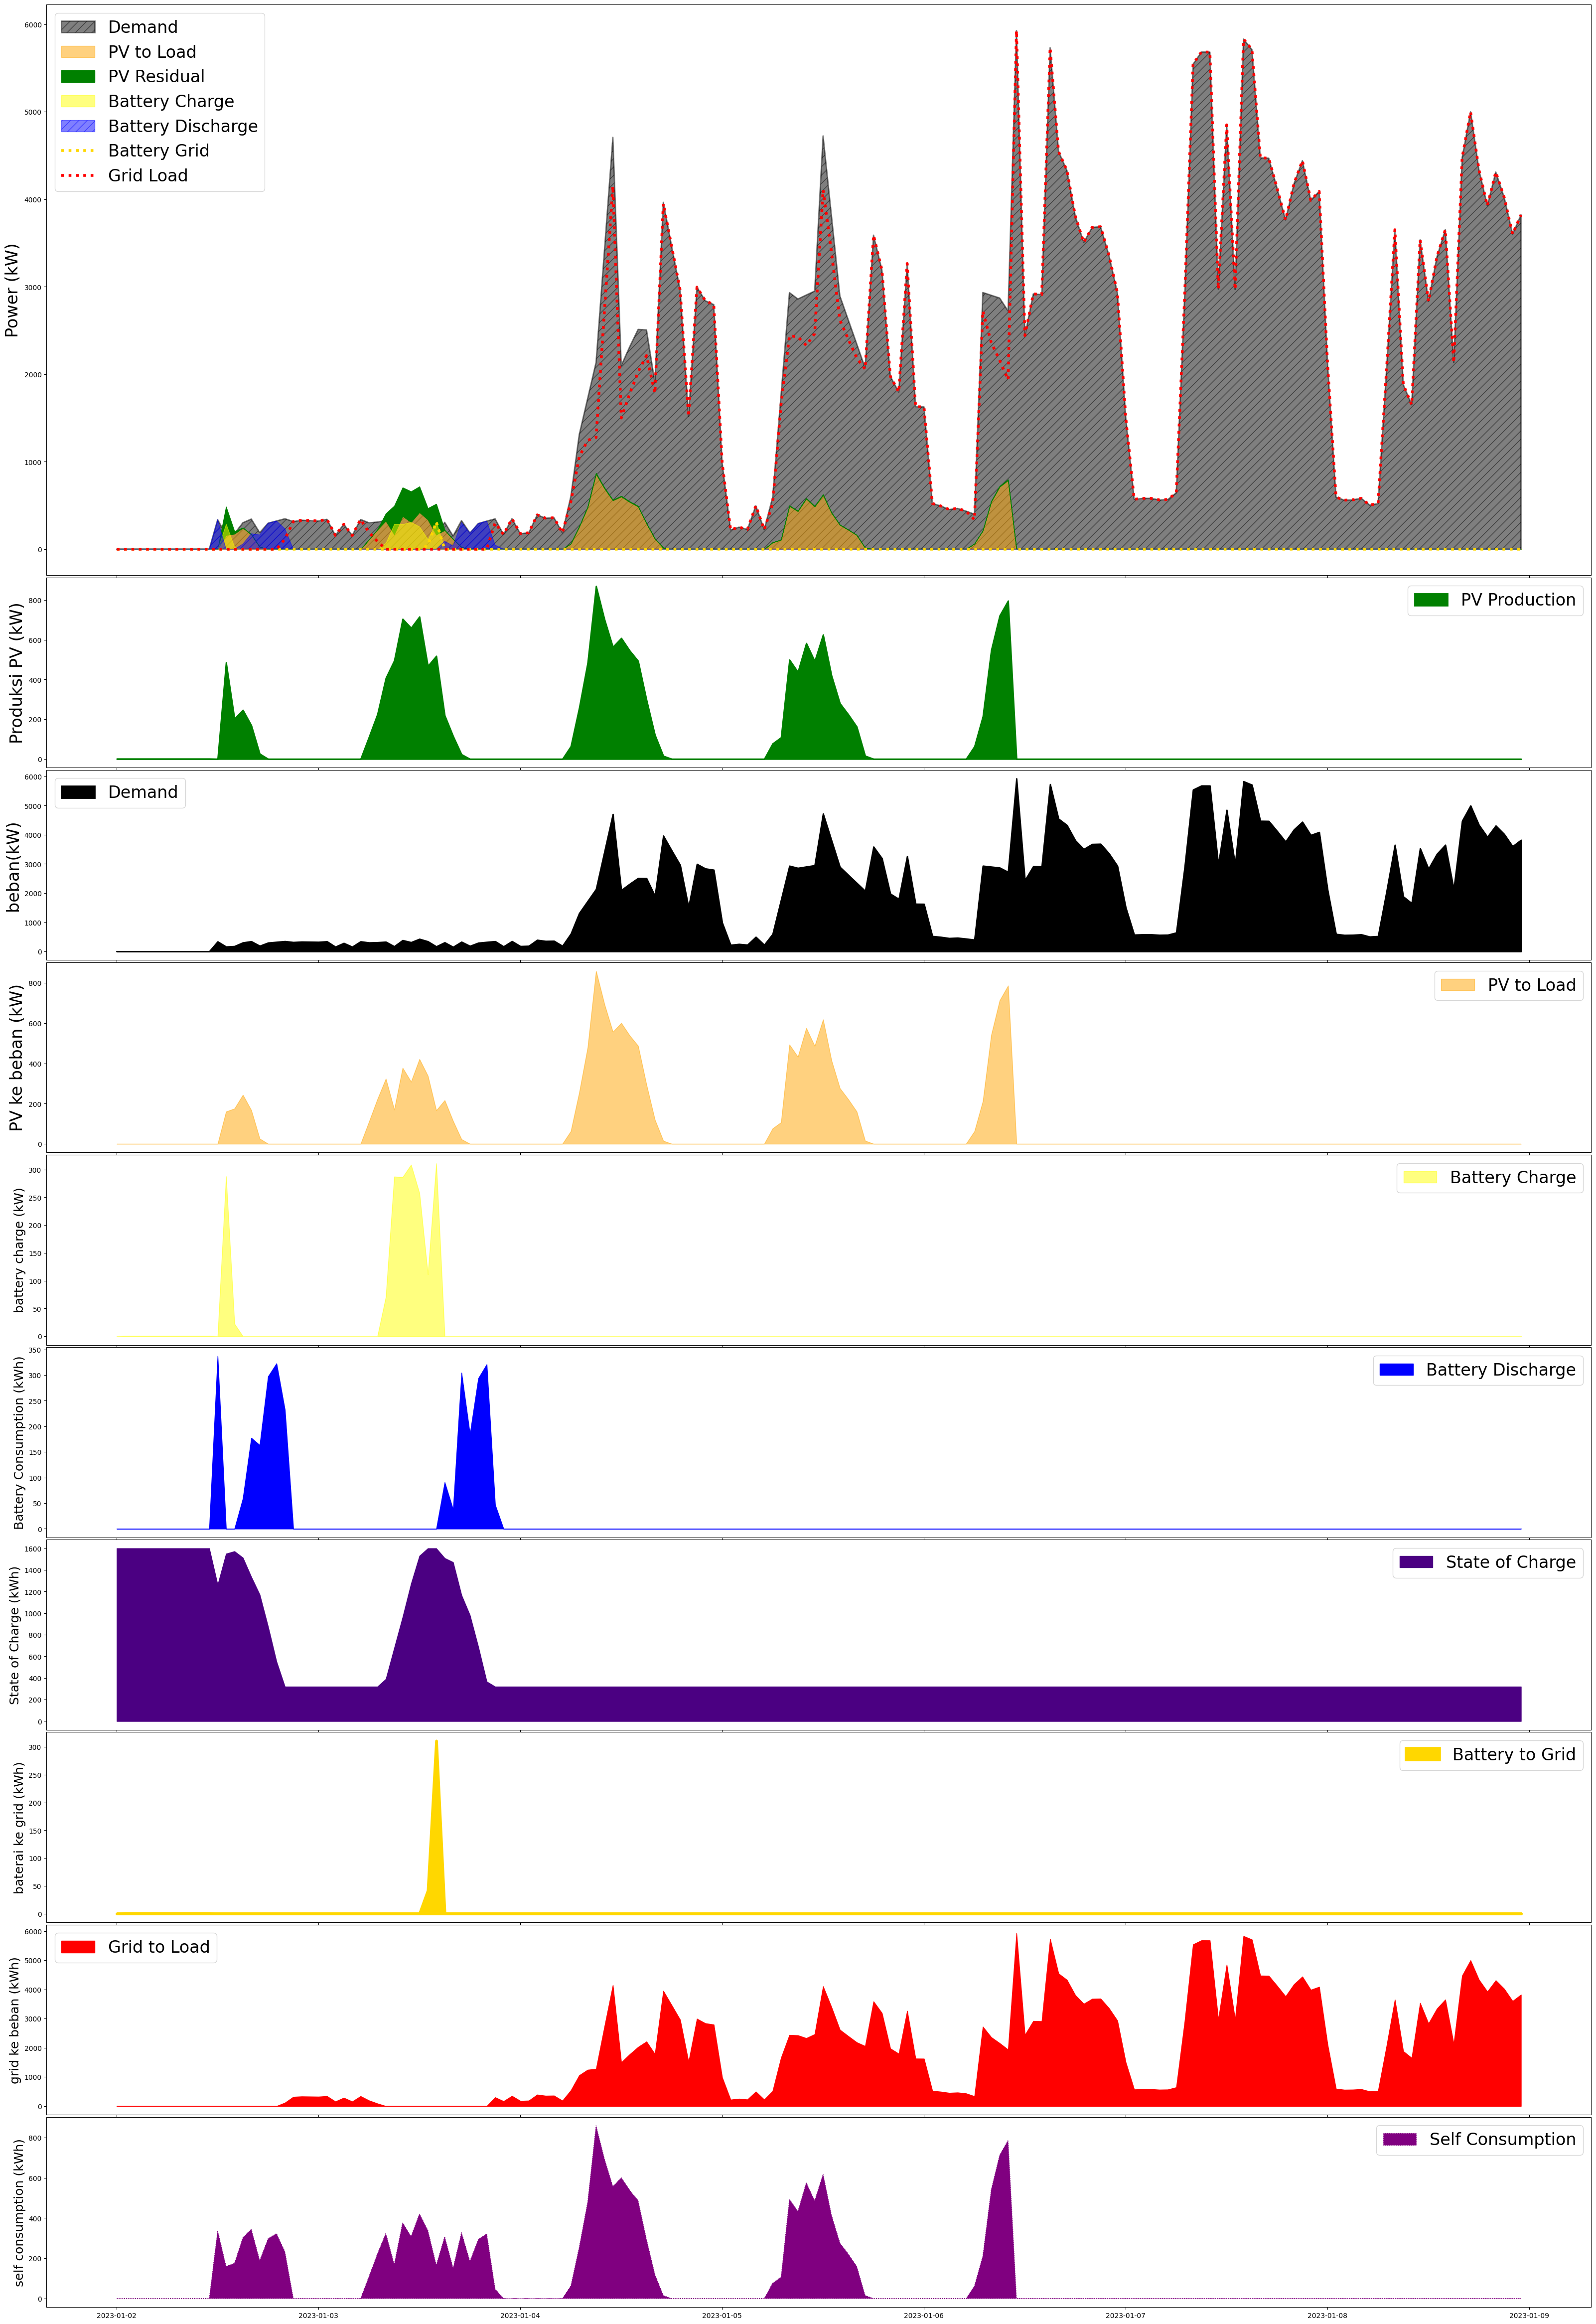

In [29]:
plotwithpcs.plot_dispatch(pv, demand, E1, week=1)

# hitam atau abu2        = beban                (kw)
# hijau                  = produksi PV          (kw)
# krem                   = produksi PV ke beban (kw)
# kuning                 = battery charge       (kw)
# biru                   = battery discharge    (kw)
# nila                   = SOC battery          (kw)
# merah ata merah putus2 = suplai dari grid     (kw)
# ungu                   = self consumption     (kw)

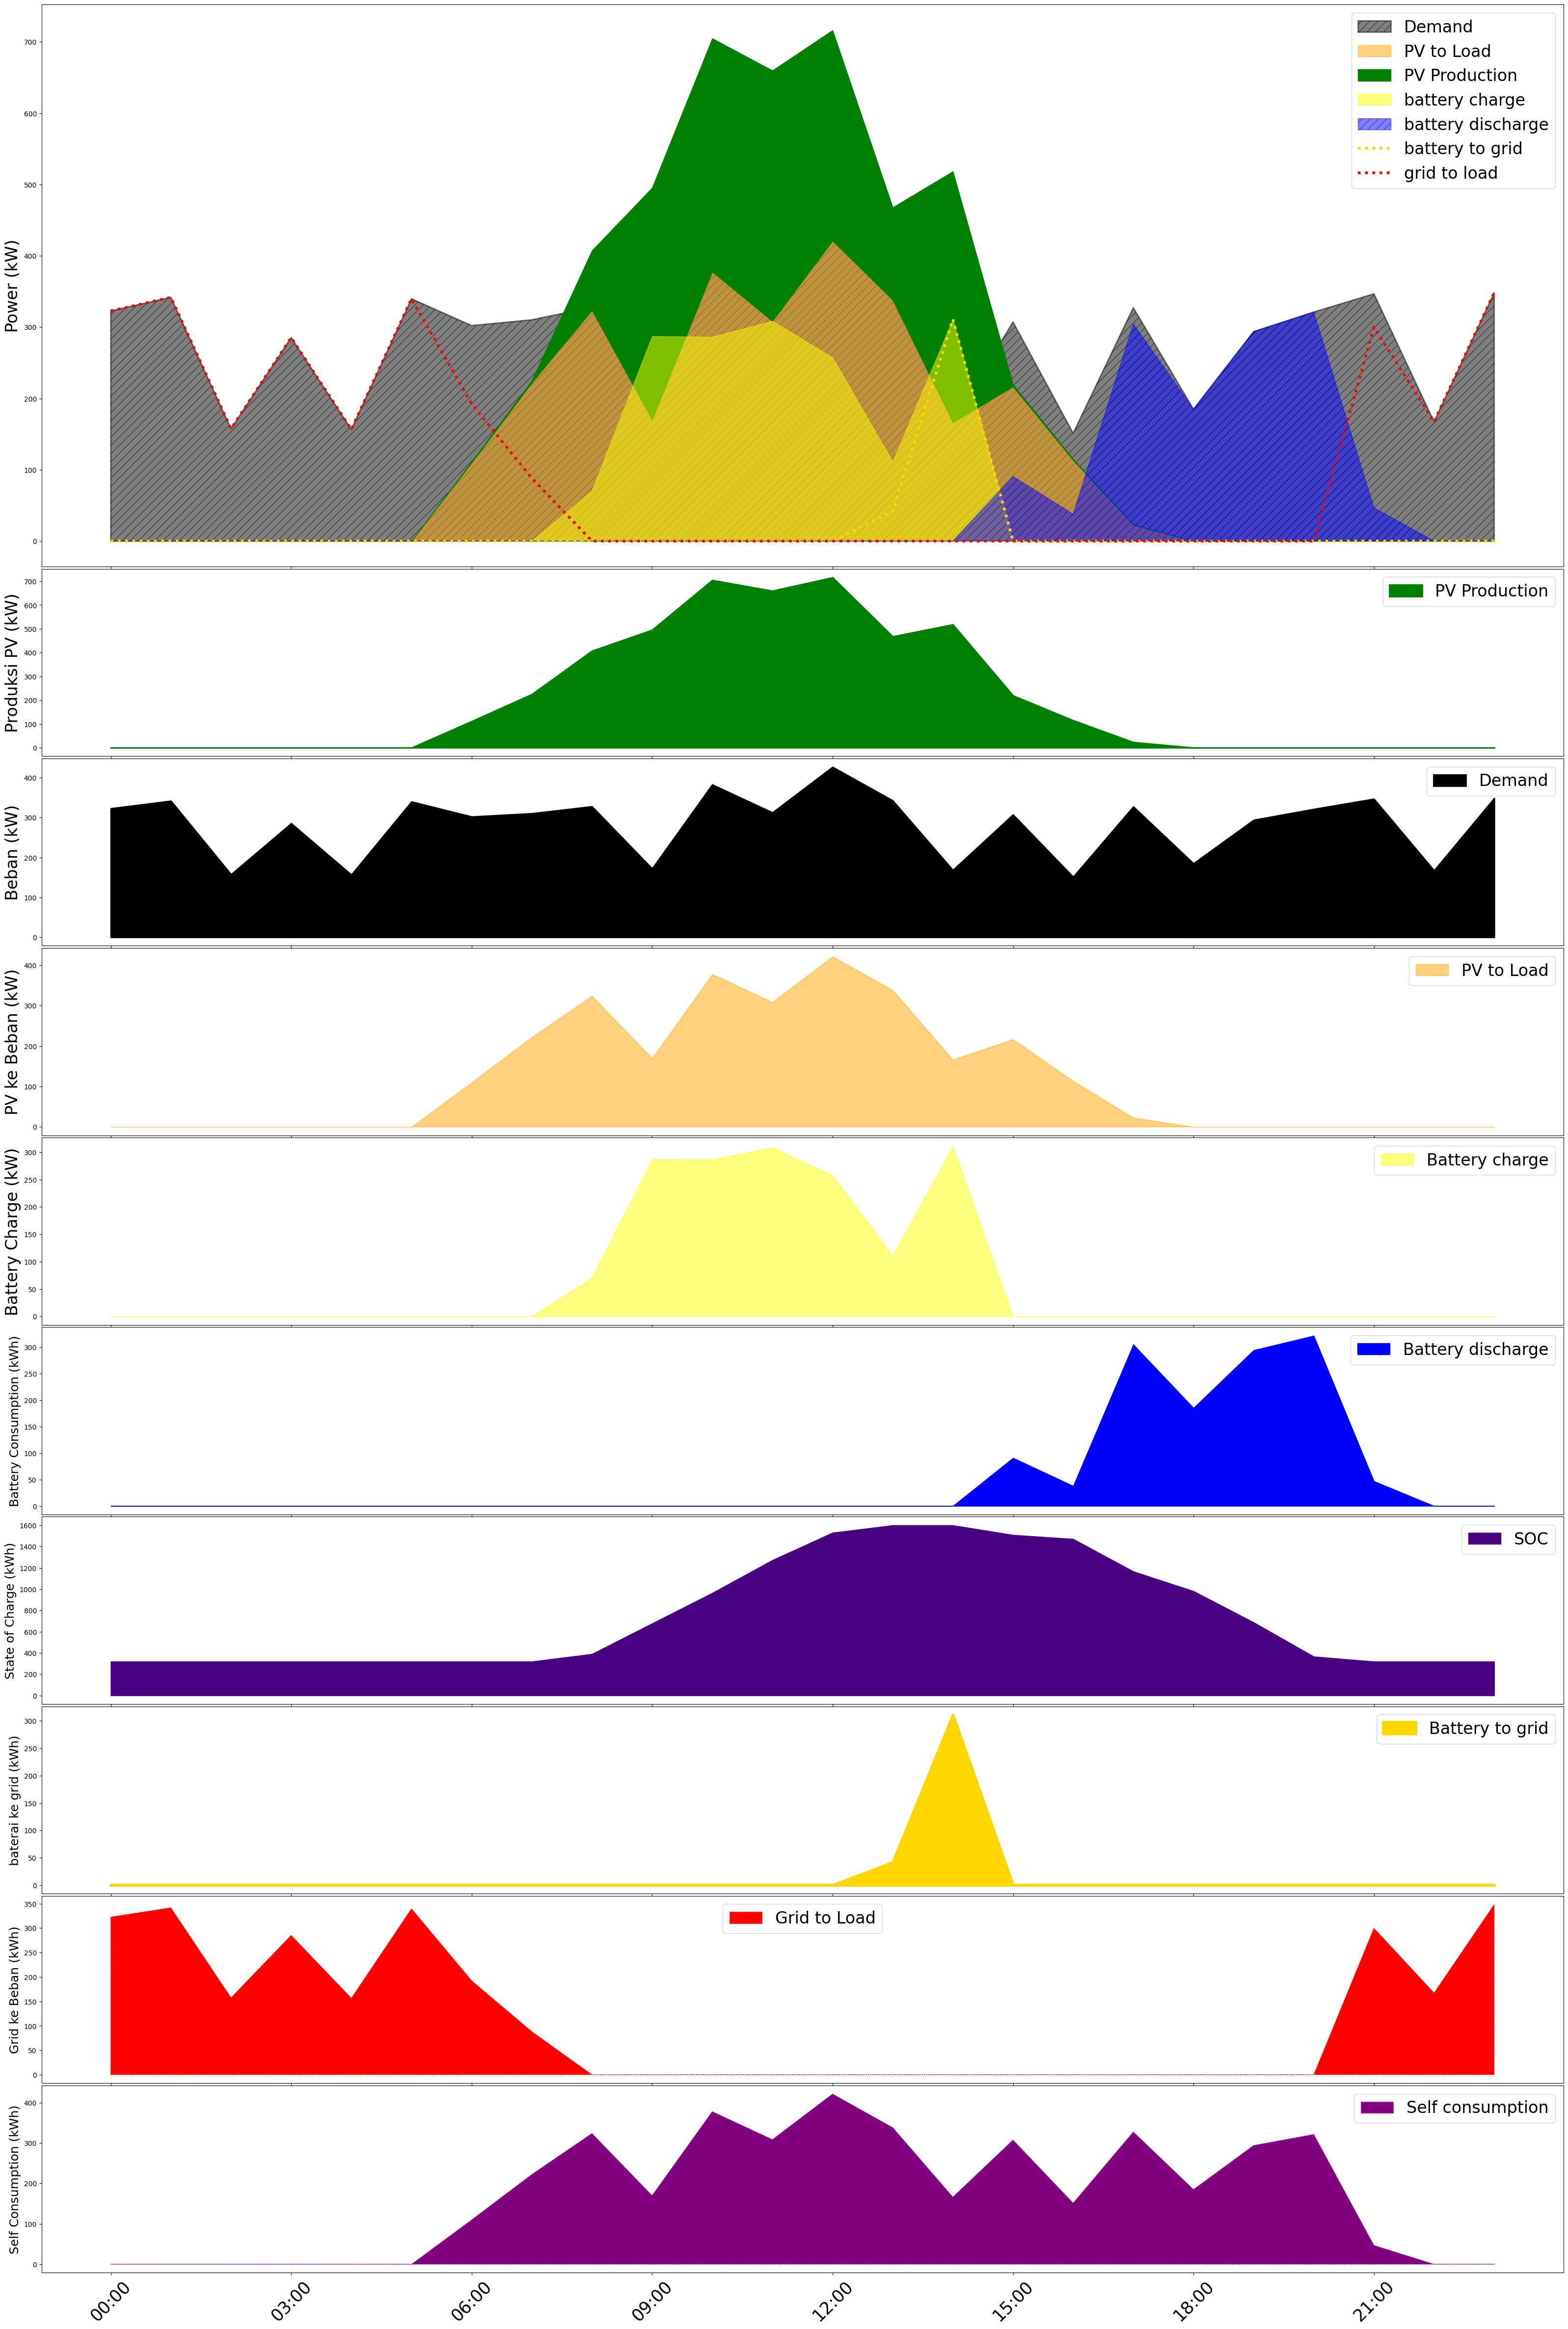

In [30]:
plotperiodwithpcs.plot_dispatch(pv, demand, E1, day=2)

# hitam atau abu2 garis       = beban                (kw)
# hijau                       = produksi PV          (kw)
# krem                        = produksi PV ke beban (kw)
# kuning                      = battery charge       (kw)
# biru atau biru garis        = battery discharge    (kw)
# nila                        = SOC battery          (kw)
# merah ata merah putus2      = suplai dari grid     (kw)
# ungu                        = self consumption     (kw)
# emas                        = suplai ke grid       (kw)

In [31]:
E2 = dispatchwithpcs.dispatch_max_sc_grid_pf(pv, demand, param_tech)

C:\Users\User\Downloads\Program PLTS\Moduls\dispatchwithpcs.py:158: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pv_inv_ongrid[i] >= demand[i]:
C:\Users\User\Downloads\Program PLTS\Moduls\dispatchwithpcs.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inv_load_ongrid[i] = demand[i] * eff_inv # inverter ke beban(produksi energi PV ke beban) = kebutuhan beban
C:\Users\User\Downloads\Program PLTS\Moduls\dispatchwithpcs.py:160: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To ac

In [32]:
E2.keys()

dict_keys(['pv_inv_ongrid', 'inv_load_ongrid', 'inv_grid_ongrid', 'res_load_ongrid', 'grid_load_ongrid', 'self_consumption_ongrid'])

In [33]:
#output = E2
#self_consumption_ongrid = output['self_consumption_ongrid']
#df = pd.DataFrame({'Time': self_consumption_ongrid.index, 'Power': self_consumption_ongrid.values.round(2)})
#print(df)
#df.to_csv('self_consumption_ongrid_jam.csv', header=False)

In [34]:
# Ubah index menjadi format datetime
#self_consumption_ongrid.index = pd.to_datetime(self_consumption_ongrid.index)

# Resample data per hari dan hitung jumlah daya per hari
#self_consumption_ongrid = self_consumption_ongrid.resample('W').sum()

# Buat DataFrame baru dengan kolom 'Date' dan 'Power'
#self_consumption_ongrid = pd.DataFrame({'Date': self_consumption_ongrid.index, 'Power': self_consumption_ongrid.values.round(2)})

# Tampilkan DataFrame hasil perubahan
#print(self_consumption_ongrid)

#self_consumption_ongrid.to_csv('self_consumption_ongrid_aktualD.csv', index=False)

In [35]:
#output = E2
#grid_load_ongrid = output['grid_load_ongrid']
#df = pd.DataFrame({'Time': grid_load_ongrid.index, 'Power': grid_load_ongrid.values.round(2)})
#print(df)
#df.to_csv('self_consumption_ongrid_jam.csv', header=False)

In [36]:
# Ubah index menjadi format datetime
#grid_load_ongrid.index = pd.to_datetime(grid_load_ongrid.index)

# Resample data per hari dan hitung jumlah daya per hari
#grid_load_ongrid = grid_load_ongrid.resample('W').sum()

# Buat DataFrame baru dengan kolom 'Date' dan 'Power'
#grid_load_ongrid = pd.DataFrame({'Date': grid_load_ongrid.index, 'Power': grid_load_ongrid.values.round(2)})

# Tampilkan DataFrame hasil perubahan
#print(grid_load_ongrid)

#grid_load_ongrid.to_csv('grid_load_ongrid_Waktual.csv', index=False)

In [42]:
analysiswithpcsongrid.print_analysis(pv, demand, param_tech, E2)

Total konsumsi pertahun         : 22403839 kWh
Total produksi pv pertahun      : 1238279.9 kWh
Self Consumption                : 1093996.9 kWh
Total daya ekspor ke grid       : 22721.88 kWh
Total daya impor dari grid      : 21309842 kWh
Self consumption rate (SCR)     : 88.348104%
Self sufficiency rate (SSR)     : 4.8830777%
Total rugi-rugi inverter        : 123828 kWh


## NPV, IRR, PBP On Grid dengan penjualan ke grid

In [38]:
# Membaca data dari file CSV
df = pd.read_csv('kasbersihongridjual.csv', header=None)
cash_flows = df[0].apply(lambda x: int(x.replace('.', '').replace('Rp', '')))
aruskasbersih = pd.read_csv('kasbersihongridjual.csv', header=None, names=['Nilai'])
kumulatifaruskas = pd.read_csv('kumulatifkasongridjual.csv', header=None, names=['Nilai'])

# Menghitung NPV (Net Present Value) dengan tingkat pengembalian 8.6%
rate_of_return = 0.086
npv = npf.npv(rate_of_return, cash_flows)
irr = npf.irr(cash_flows)

def payback():
    # Mengonversi kolom 'Nilai' ke tipe data numerik
    aruskasbersih['Nilai'] = aruskasbersih['Nilai'].str.replace('.', '').astype(float)
    kumulatifaruskas['Nilai'] = kumulatifaruskas['Nilai'].str.replace('.', '').astype(float)

    full_year = (kumulatifaruskas['Nilai'] < 0).idxmax() 
    fractional_year = -kumulatifaruskas.loc[full_year, 'Nilai'] / aruskasbersih.loc[full_year + 1, 'Nilai']
    period = full_year + fractional_year
    return round(period, 1)
    
# Menampilkan hasil NPV, IRR, dan present values
print("NPV dengan penjualan ke grid:", npv)
print("IRR dengan penjualan ke grid: {:.2f}%".format(irr * 100))
print("Payback Period dengan penjualan ke grid:", payback(), "tahun")

 


NPV dengan penjualan ke grid: 3700184394.6517577
IRR dengan penjualan ke grid: 13.30%
Payback Period dengan penjualan ke grid: 7.1 tahun


## NPV, IRR, PBP On Grid tanpa penjualan ke grid

In [39]:
# Membaca data dari file CSV
df = pd.read_csv('kasbersihongrid.csv', header=None)
cash_flows = df[0].apply(lambda x: int(x.replace('.', '').replace('Rp', '')))
aruskasbersih = pd.read_csv('kasbersihongrid.csv', header=None, names=['Nilai'])
kumulatifaruskas = pd.read_csv('kumulatifkasongrid.csv', header=None, names=['Nilai'])

# Menghitung NPV (Net Present Value) dengan tingkat pengembalian 8.6%
rate_of_return = 0.086
npv = npf.npv(rate_of_return, cash_flows)
irr = npf.irr(cash_flows)

def payback():
    # Mengonversi kolom 'Nilai' ke tipe data numerik
    aruskasbersih['Nilai'] = aruskasbersih['Nilai'].str.replace('.', '').astype(float)
    kumulatifaruskas['Nilai'] = kumulatifaruskas['Nilai'].str.replace('.', '').astype(float)

    full_year = (kumulatifaruskas['Nilai'] < 0).idxmax() 
    fractional_year = -kumulatifaruskas.loc[full_year, 'Nilai'] / aruskasbersih.loc[full_year + 1, 'Nilai']
    period = full_year + fractional_year
    return round(period, 1)
    
# Menampilkan hasil NPV, IRR, dan present values
print("NPV dengan penjualan ke grid:", npv)
print("IRR dengan penjualan ke grid: {:.2f}%".format(irr * 100))
print("Payback Period dengan penjualan ke grid:", payback(), "tahun")

 


NPV dengan penjualan ke grid: 2684616744.7723846
IRR dengan penjualan ke grid: 11.89%
Payback Period dengan penjualan ke grid: 7.4 tahun


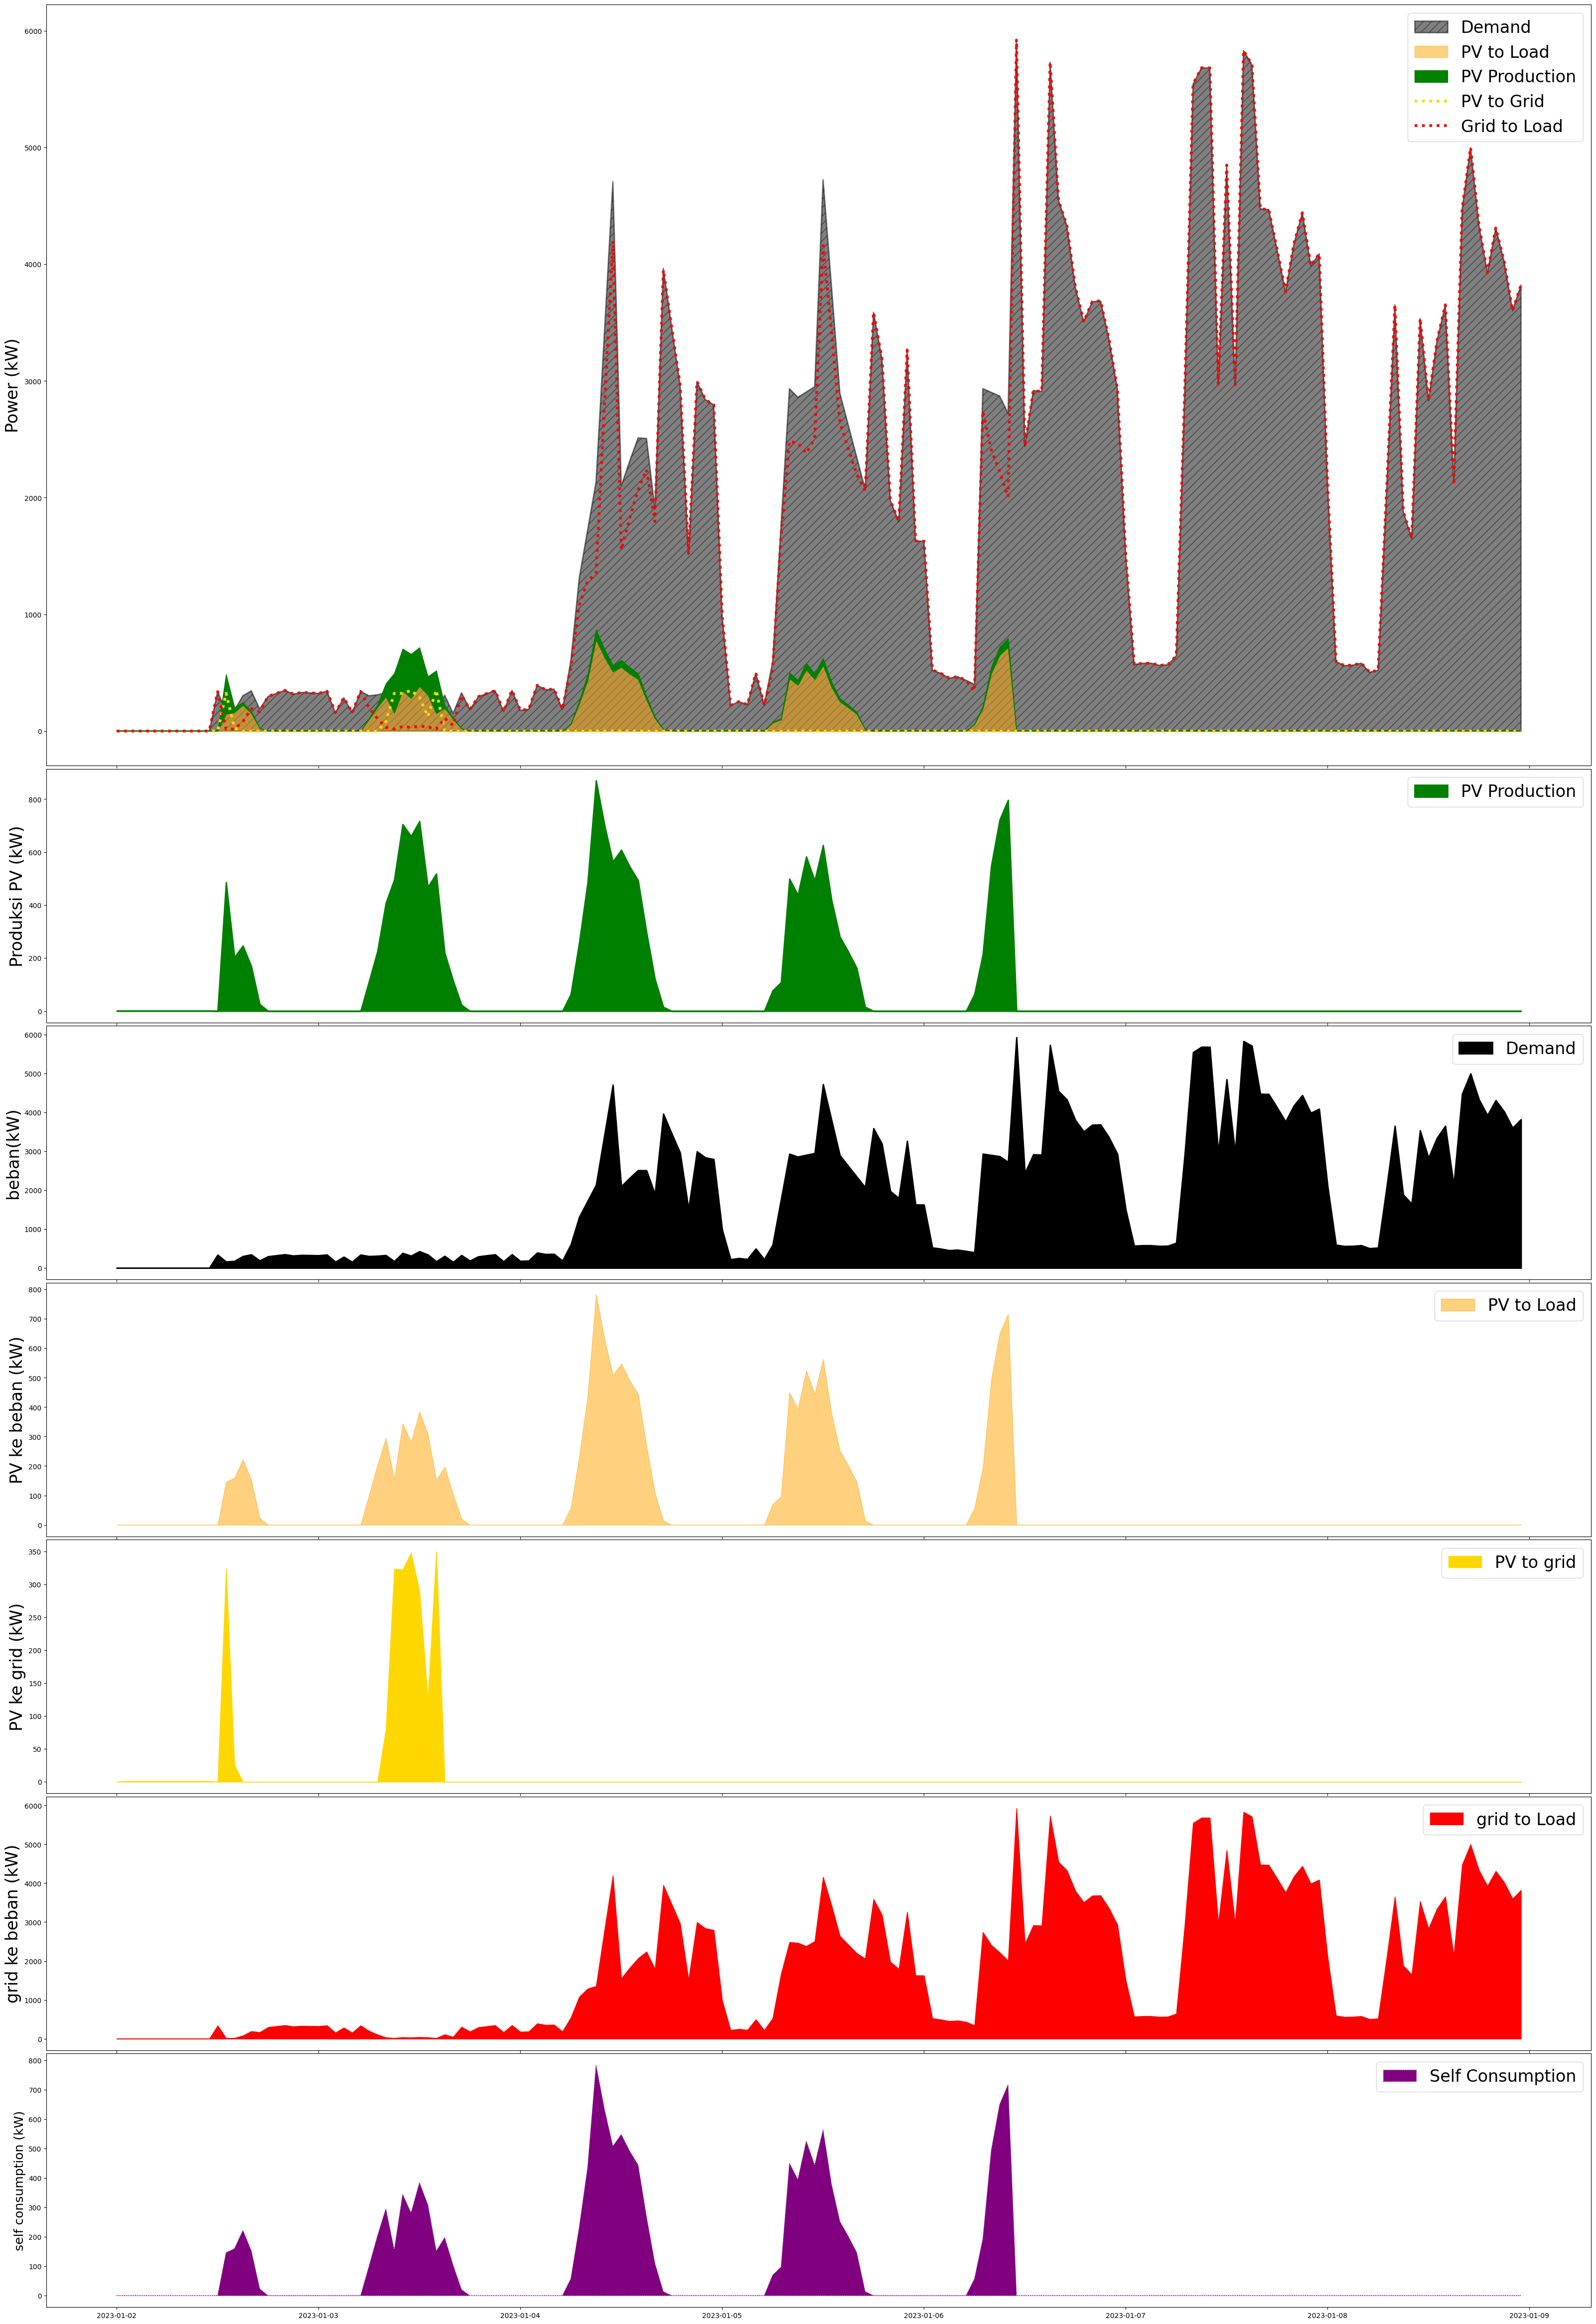

In [40]:
plotwithpcs.plot_dispatc(pv, demand, E2, week=1)

# hitam atau abu2 garis       = beban                (kw)
# hijau                       = produksi PV          (kw)
# krem                        = produksi PV ke beban (kw)
# emas                        = suplai ke grid       (kw)
# merah ata merah putus2      = suplai dari grid     (kw)
# ungu                        = self consumption     (kw)


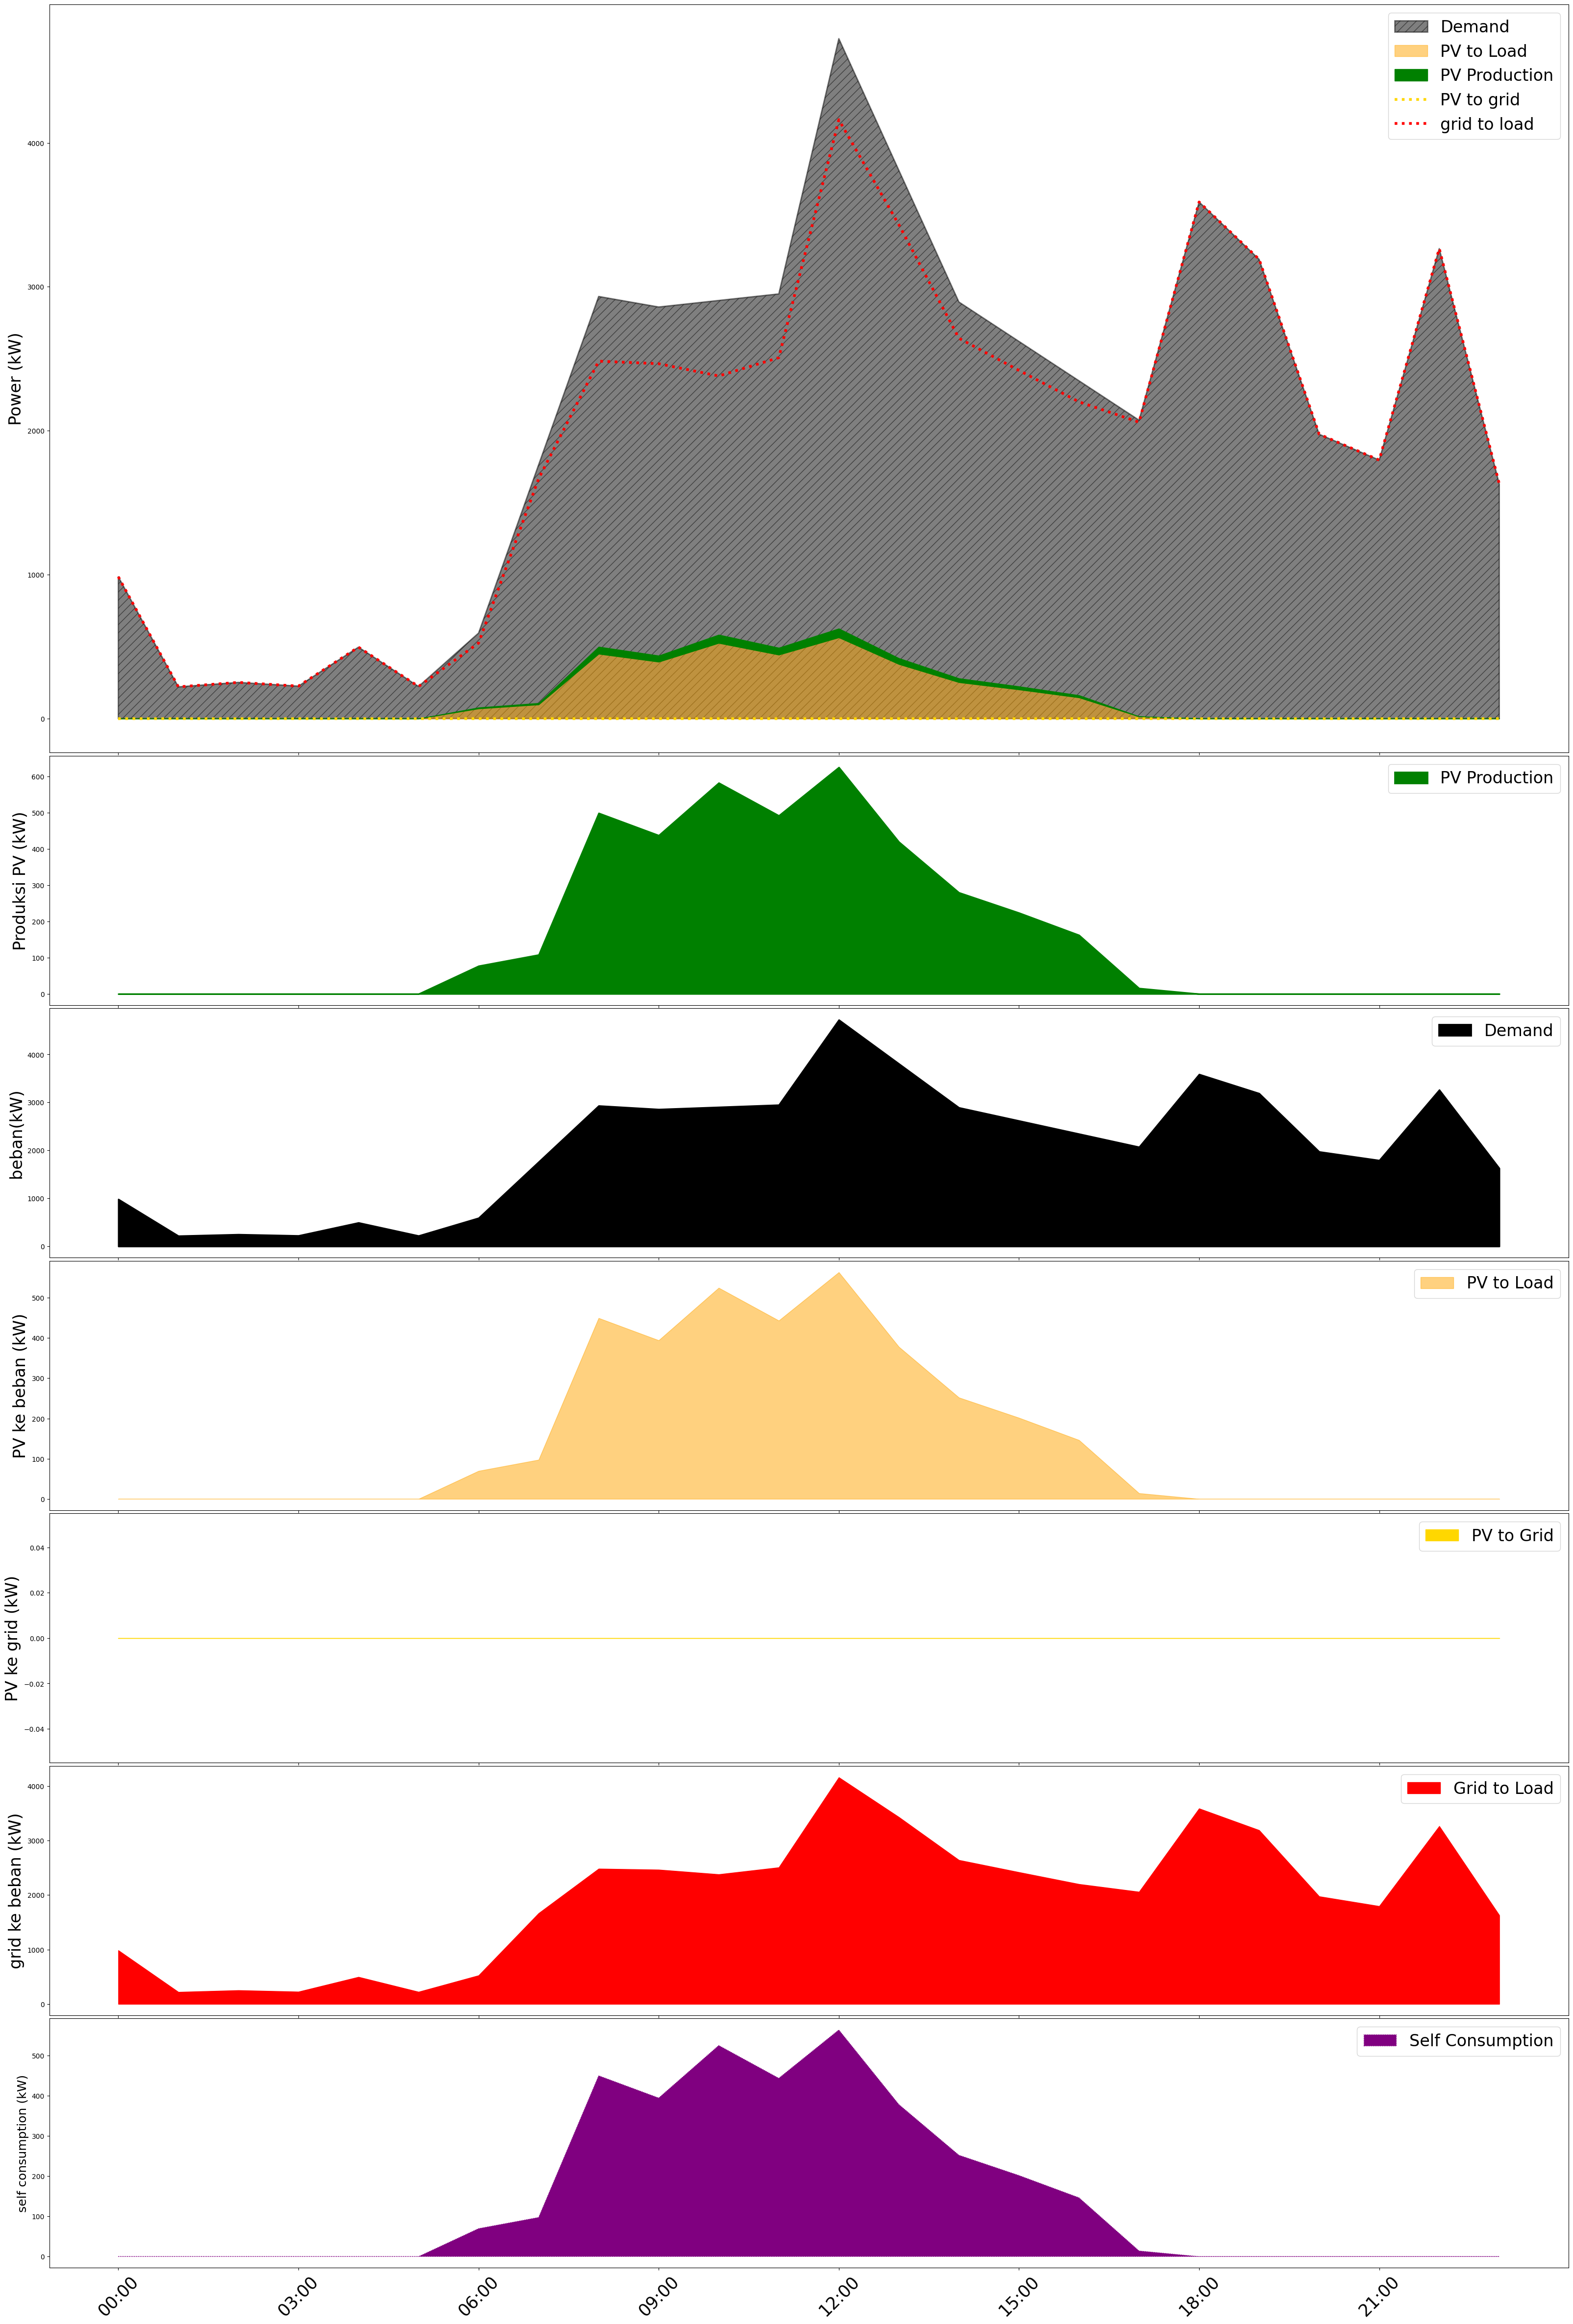

In [41]:
plotperiodwithpcs.plot_dispatc(pv, demand, E2, day=4)

# hitam atau abu2 garis       = beban                (kw)
# hijau                       = produksi PV          (kw)
# krem                        = produksi PV ke beban (kw)
# emas                        = suplai ke grid       (kw)
# merah ata merah putus2      = suplai dari grid     (kw)
# ungu                        = self consumption     (kw)
